In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from pandarallel import pandarallel

In [2]:
df_bo = pd.read_csv("clean_2016.csv", encoding='latin-1')
df_bo.head()

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NUM_BO  ANO_BO  ID_DELEGACIA                         NOME_DEPARTAMENTO  \
0    3784    2016         10101  DECAP                                      
1    3426    2016         10102  DECAP                                      
2    6359    2016         10102  DECAP                                      
3    1267    2016         10103  DECAP                                      
4    4804    2016         10106  DECAP                                      

                             NOME_SECCIONAL                       DELEGACIA  \
0  DEL.SEC.1º CENTRO                         01º D.P. SE                      
1  DEL.SEC.1º CENTRO                         02º D.P. BOM RETIRO              
2  DEL.SEC.1º CENTRO                         02º D.P. BOM RETIRO              
3  DEL.SEC.1º CENTRO                         03º D.P. CAMPOS ELISEOS          
4  DEL.SEC.1º CENTRO                         06º D.P. CAMBUCI                 

                     NOME_DEPARTAMENTO_CIRC  \
0  DECAP                                      
1  DECAP                                      
2  DECAP                                      
3  DECAP                                      
4  DECAP                                      

                        NOME_SECCIONAL_CIRC             NOME_DELEGACIA_CIRC  \
0  DEL.SEC.1º CENTRO                         78º D.P. JARDINS                 
1  DEL.SEC.1º CENTRO                         03º D.P. CAMPOS ELISEOS          
2  DEL.SEC.1º CENTRO                         03º D.P. CAMPOS ELISEOS          
3  DEL.SEC.8º SAO MATEUS                     49º D.P.  SAO MATEUS             
4  DEL.SEC.1º CENTRO                         06º D.P. CAMBUCI                 

    ANO  ...                                            RUBRICA DESDOBRAMENTO  \
0  2016  ...                                   Furto (art. 155)           NaN   
1  2016  ...                                   Roubo (art. 157)           NaN   
2  2016  ...  Drogas sem autorização ou em desacordo (Art.33...           NaN   
3  2016  ...                                   Roubo (art. 157)           NaN   
4  2016  ...                          Lesão corporal (art. 129)           NaN   

      CONDUTA   LATITUDE  LONGITUDE                                    CIDADE  \
0  TRANSEUNTE -23.564984 -46.652035  S.PAULO                                    
1  TRANSEUNTE -23.542476 -46.641928  S.PAULO                                    
2         NaN -23.542183 -46.640599  S.PAULO                                    
3       CARGA -23.609275 -46.455087  S.PAULO                                    
4         NaN -23.573928 -46.620693  S.PAULO                                    

                                 LOGRADOURO NUMERO_LOGRADOURO FLAG_STATUS.1  \
0  AVENIDA PAULISTA                                      1000             C   
1  PRAÇA DA REPUBLICA                                       0             C   
2  RUA CONSELHEIRO NEBIAS                                   0             C   
3  RUA MADUREIRA CALHEIROS                                 15             C   
4  RUA ROBERTSON                                          625             C   

  Unnamed: 21  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [3]:
df_bo.NUM_BO

0         3784
1         3426
2         6359
3         1267
4         4804
          ... 
770366    8105
770367    5789
770368    3093
770369    1553
770370    2361
Name: NUM_BO, Length: 770371, dtype: int64

In [4]:
df_bo.RUBRICA

0                                          Furto (art. 155)
1                                          Roubo (art. 157)
2         Drogas sem autorização ou em desacordo (Art.33...
3                                          Roubo (art. 157)
4                                 Lesão corporal (art. 129)
                                ...                        
770366                                     Furto (art. 155)
770367                                     Roubo (art. 157)
770368                                     Furto (art. 155)
770369                                     Roubo (art. 157)
770370                            Lesão corporal (art. 129)
Name: RUBRICA, Length: 770371, dtype: object

In [5]:
df_bo.LATITUDE

0        -23.564984
1        -23.542476
2        -23.542183
3        -23.609275
4        -23.573928
            ...    
770366   -23.560675
770367   -23.632502
770368   -23.606811
770369   -23.522110
770370   -23.651473
Name: LATITUDE, Length: 770371, dtype: float64

In [6]:
df_bo.LONGITUDE

0        -46.652035
1        -46.641928
2        -46.640599
3        -46.455087
4        -46.620693
            ...    
770366   -46.672173
770367   -46.738877
770368   -46.665355
770369   -46.418549
770370   -46.613802
Name: LONGITUDE, Length: 770371, dtype: float64

In [7]:
df_bo.CIDADE

0         S.PAULO                                 
1         S.PAULO                                 
2         S.PAULO                                 
3         S.PAULO                                 
4         S.PAULO                                 
                            ...                   
770366    S.PAULO                                 
770367    S.PAULO                                 
770368    S.PAULO                                 
770369    S.PAULO                                 
770370    S.PAULO                                 
Name: CIDADE, Length: 770371, dtype: object

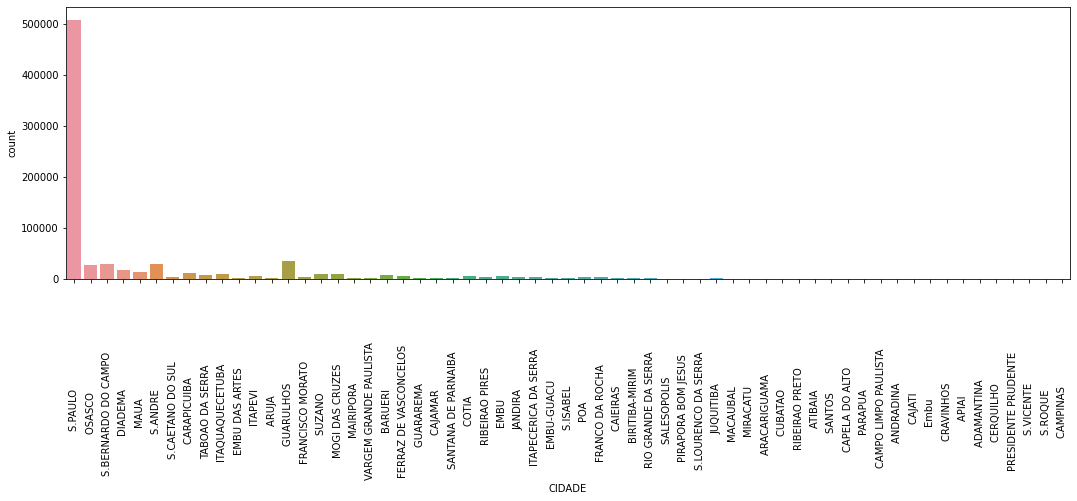

In [8]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.countplot(df_bo.CIDADE)

In [9]:
df_karine = pd.DataFrame({"num_bo":df_bo.NUM_BO, "rubrica":df_bo.RUBRICA, "latitude":df_bo.LATITUDE, "longitude":df_bo.LONGITUDE, "cidade":df_bo.CIDADE})

In [14]:
df_karine["cidade"].isin(["S.PAULO"])

0         False
1         False
2         False
3         False
4         False
          ...  
770366    False
770367    False
770368    False
770369    False
770370    False
Name: cidade, Length: 770371, dtype: bool

In [28]:
df_karine["cidade"] = df_karine["cidade"].apply(lambda x: x.strip())

In [30]:
df_filter = df_karine[df_karine["cidade"] == "S.PAULO"]

In [33]:
df_filter.shape

(508084, 5)

In [34]:
df_filter[["num_bo", "latitude", "longitude"]].to_csv("bos_latlong.csv", index=False)